In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Задание 1

In [2]:
df = pd.read_csv('test1_completed.csv')

In [3]:
df

,id,Товар,Количество
0,17119,Лимон,1.10
1,17119,Лимон оранжевый,0.70
2,17119,Лук-порей,10.00
3,17119,Лук репчатый,2.50
4,17119,Малина свежая,1.00
...,...,...,...
43509,119396,Укроп,0.25
43510,119396,Свекла,2.00
43511,119396,Физалис,1.00
43512,119396,Черешня сушеная,1.70


In [4]:
df.isna().sum()  # пропусков нет

id            0
Товар         0
Количество    0
dtype: int64

In [5]:
df.columns = ['id', 'products', 'quantity']  # переименовал колонки, чтобы удобнее было к ним обращаться
df

,id,products,quantity
0,17119,Лимон,1.10
1,17119,Лимон оранжевый,0.70
2,17119,Лук-порей,10.00
3,17119,Лук репчатый,2.50
4,17119,Малина свежая,1.00
...,...,...,...
43509,119396,Укроп,0.25
43510,119396,Свекла,2.00
43511,119396,Физалис,1.00
43512,119396,Черешня сушеная,1.70


In [6]:
df1 = df.pivot_table(values='quantity', index='id',
                     columns='products', aggfunc='count').fillna(0)

In [7]:
df1

products,Абрикос вяленый,Абрикосы молдавские,Авокадо ХАСС,Авокадо стандарт,Алыча вяленая,Ананас Gold,Ананасовые кольца,Апельсины столовые,Арбуз,Арбуз овальный,...,Яблоки Гала,Яблоки Голден,Яблоки Джонаголд,Яблоки Мутсу,Яблоки Симиренко,Яблоки Фуджи,Яблоки Чемпион,Яблоки сезонные,Яблоки сушеные,Ягоды Годжи
id,,,,,,,,,,,,,,,,,,,,,
17119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17618,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17724,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119110,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
119206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# создадим матрицу Грама
# например при скалярном произведении вектора "Абрикос вяленый" на вектор "Абрикосы молдавские" мы получим сколько раз они покупались
# вместе
matrix_purhases = df1.T.dot(df1)

In [9]:
# все значения по диагонали заменим на ноль
np.fill_diagonal(matrix_purhases.to_numpy(), 0)
matrix_purhases

products,Абрикос вяленый,Абрикосы молдавские,Авокадо ХАСС,Авокадо стандарт,Алыча вяленая,Ананас Gold,Ананасовые кольца,Апельсины столовые,Арбуз,Арбуз овальный,...,Яблоки Гала,Яблоки Голден,Яблоки Джонаголд,Яблоки Мутсу,Яблоки Симиренко,Яблоки Фуджи,Яблоки Чемпион,Яблоки сезонные,Яблоки сушеные,Ягоды Годжи
products,,,,,,,,,,,,,,,,,,,,,
Абрикос вяленый,0.0,20.0,10.0,14.0,6.0,5.0,7.0,14.0,42.0,7.0,...,12.0,4.0,9.0,3.0,9.0,5.0,5.0,5.0,7.0,7.0
Абрикосы молдавские,20.0,0.0,37.0,46.0,23.0,23.0,19.0,48.0,141.0,37.0,...,30.0,26.0,29.0,23.0,35.0,26.0,27.0,23.0,18.0,29.0
Авокадо ХАСС,10.0,37.0,0.0,25.0,7.0,15.0,18.0,32.0,80.0,16.0,...,14.0,16.0,15.0,14.0,19.0,19.0,17.0,13.0,14.0,16.0
Авокадо стандарт,14.0,46.0,25.0,0.0,14.0,18.0,15.0,31.0,86.0,14.0,...,16.0,20.0,11.0,18.0,16.0,17.0,18.0,15.0,9.0,18.0
Алыча вяленая,6.0,23.0,7.0,14.0,0.0,9.0,9.0,23.0,41.0,9.0,...,9.0,6.0,11.0,10.0,5.0,9.0,9.0,9.0,13.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Яблоки Фуджи,5.0,26.0,19.0,17.0,9.0,6.0,9.0,15.0,48.0,14.0,...,11.0,11.0,13.0,13.0,22.0,0.0,10.0,5.0,10.0,8.0
Яблоки Чемпион,5.0,27.0,17.0,18.0,9.0,9.0,9.0,18.0,41.0,14.0,...,13.0,11.0,11.0,7.0,11.0,10.0,0.0,10.0,7.0,11.0
Яблоки сезонные,5.0,23.0,13.0,15.0,9.0,10.0,12.0,22.0,52.0,10.0,...,16.0,8.0,3.0,7.0,10.0,5.0,10.0,0.0,8.0,11.0


In [10]:
df_final = pd.DataFrame(matrix_purhases.mask(
    np.triu(np.ones(matrix_purhases.shape)).astype(bool)).stack())
df_final

0
products            products                 
Абрикосы молдавские Абрикос вяленый      20.0
Авокадо ХАСС        Абрикос вяленый      10.0
                    Абрикосы молдавские  37.0
Авокадо стандарт    Абрикос вяленый      14.0
                    Абрикосы молдавские  46.0
...                                       ...
Ягоды Годжи         Яблоки Симиренко     12.0
                    Яблоки Фуджи          8.0
                    Яблоки Чемпион       11.0
                    Яблоки сезонные      11.0
                    Яблоки сушеные        7.0

[19701 rows x 1 columns]

In [11]:
df_final.reset_index(1).rename(columns={'products': 'Товар_2'})\
        .reset_index().rename(columns={'products': 'Товар_1', 0: 'Встречаемость'})\
        .sort_values('Встречаемость', ascending=False)\
        .head(5)

,Товар_1,Товар_2,Встречаемость
13643,Укроп,Огурцы Луховицкие,431.0
13657,Укроп,Петрушка,408.0
6336,Огурцы Луховицкие,Арбуз,345.0
6383,Огурцы Луховицкие,Кабачки,326.0
13597,Укроп,Кинза,303.0


# Задание 2

Данных для построения прогноза продаж крайне мало. Технически построить прогноз можно,
но такой прогноз смысла иметь не будет. Но я напишу код для построения, чтобы показать, что я понимаю как это делается. Нужно исключить часть данных из обучения для того, чтобы измерить качество полученного прогноза, но мы этого делать не будем так как тогда не останется совсем данных для обучения.

In [12]:
from fbprophet import Prophet
import holidays

In [13]:
df = pd.read_csv('test2_completed.csv')

In [14]:
df

,Дата,Число заказов
0,2020-01-05,650
1,2020-01-12,837
2,2020-01-19,1020
3,2020-01-26,1176
4,2020-02-02,1489
5,2020-02-09,1823
6,2020-02-16,1991
7,2020-02-23,2166
8,2020-03-01,2334
9,2020-03-08,2607


In [15]:
df.shape

(14, 2)

In [16]:
df.columns = ['ds', 'y']

In [17]:
df.ds = pd.to_datetime(df.ds)

In [18]:
# создал датафрейм с датами, когда была акция
# если бы данных было бы много можно было бы добавить и праздничные дни
sales = pd.DataFrame(columns=['ds', 'holiday'])
sales.ds = ['2020-02-02', '2020-02-09']
sales.ds = pd.to_datetime(sales.ds)
sales.fillna('sale', inplace=True)
sales

,ds,holiday
0,2020-02-02,sale
1,2020-02-09,sale


In [19]:
prophet_basic = Prophet(holidays=sales, changepoint_prior_scale=0.09)
prophet_basic.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.


In [20]:
# в задание требуется сделать прогноз на 3 месяца - это примерно 12 недель
future = prophet_basic.make_future_dataframe(periods=12, freq='w') 
future.head()

,ds
0,2020-01-05
1,2020-01-12
2,2020-01-19
3,2020-01-26
4,2020-02-02


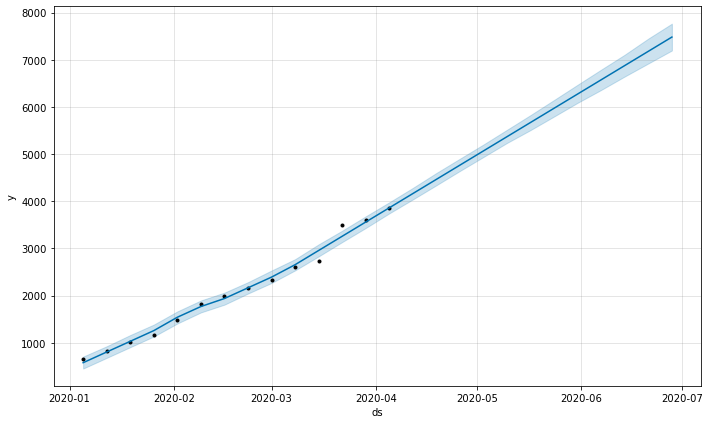

In [21]:
forecast = prophet_basic.predict(future)
fig1 = prophet_basic.plot(forecast)

In [22]:
# предсказанные значения
forecast.loc[14:,['ds', 'trend']].rename(columns={"ds":"Дата", "trend":"Число заказов"})

,Дата,Число заказов
14,2020-04-12,4164.412439
15,2020-04-19,4466.045380
16,2020-04-26,4767.678322
17,2020-05-03,5069.311264
18,2020-05-10,5370.944206
19,2020-05-17,5672.577148
20,2020-05-24,5974.210090
21,2020-05-31,6275.843032
22,2020-06-07,6577.475974
23,2020-06-14,6879.108916


# Задание 3

In [23]:
import pandahouse as ph

In [24]:
connection_default = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [25]:
# это уже финальный код таблицы. ниже я распишу все подзапросы, чтобы было понятнее
q = '''
SELECT
    l.purchase_date,
    l.purchase_id,
    l.client_id,
    l.client_age_year,
    l.client_regestration_age_month,
    l.client_category,
    l.promotion_name,
    l.category_name,
    l.partner_name,
    r.client_city,
    r.city,
    l.revenue,
    l.quantity
FROM
(
    SELECT
        l.client_category,
        l.city_id,
        l.purchase_date,
        l.purchase_id,
        l.quantity,
        l.revenue,
        l.partner_name,
        l.promotion_name,
        l.category_name,
        r.client_age_year,
        r.client_regestration_age_month,
        r.client_id AS client_id,
        r.client_city_id
    FROM    
        (
        SELECT
            l.client_id,
            l.city_id,
            l.client_category,
            l.purchase_date,
            l.purchase_id,
            l.quantity,
            l.revenue,
            r.partner_name,
            r.promotion_name,
            r.category_name
        FROM 
            (
            SELECT
                promotion_id,
                city_id,
                client_id,
                if (quantity=='1', 'new', 'old') AS client_category,
                toDate(purchase_date) AS purchase_date,
                purchase_id,
                toInt32(quantity)*toFloat32(price) AS revenue,
                toInt32(quantity) AS quantity
            FROM project_variant_2.purchase
            WHERE 
                status=='1'
                AND purchase_date BETWEEN '2020-05-01' AND '2020-08-01'
            ) as l
        JOIN project_variant_2.promotion as r
            ON l.promotion_id = r.promotion_id
        ) as l
    JOIN
        (SELECT 
            dateDiff('year',toDate(birth_date), toDate(now())) AS client_age_year,
            dateDiff('month',toDate(registration), toDate(now())) AS client_regestration_age_month,
            client_id,
            client_city_id
        FROM project_variant_2.client   
        ) as r
    ON l.client_id = r.client_id
) as l
LEFT JOIN project_variant_2.city as r
ON l.city_id = r.city_id AND l.client_city_id = r.client_city_id
'''

In [26]:
df = ph.read_clickhouse(query=q, connection=connection_default)
df

,purchase_date,purchase_id,client_id,client_age_year,client_regestration_age_month,client_category,promotion_name,category_name,partner_name,client_city,city,revenue,quantity
0,2020-06-05,0,853,29,20,old,campaign_2,Фрукты,"ООО Ширяева, Хохлова и Тимофеева",Ярославль,Киев,150.0,5
1,2020-06-15,1,406,24,16,old,campaign_4,Прочее,KarpovCourses,Минск,Новгород,1150.0,5
2,2020-08-01,9,867,25,8,old,campaign_1,Бакалея,Google,Киев,Москва,1840.0,4
3,2020-07-16,15,109,30,27,old,campaign_4,Прочее,KarpovCourses,Щучинщина,Санкт-Петербург,440.0,8
4,2020-06-29,22,528,21,10,old,campaign_2,Фрукты,"ООО Ширяева, Хохлова и Тимофеева",,,390.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2730,2020-07-28,8241,602,23,15,old,campaign_1,Бакалея,Google,Щучинщина,Вена,780.0,6
2731,2020-07-15,8245,46,31,25,old,campaign_1,Бакалея,Google,Москва,Минск,2275.0,5
2732,2020-06-09,8246,954,25,11,old,campaign_4,Прочее,KarpovCourses,Санкт-Петербург,Вена,3120.0,8
2733,2020-08-01,8247,279,22,15,old,campaign_4,Прочее,KarpovCourses,Казань,Новгород,735.0,7


In [27]:
# создал новый столбец client_category
# преобразовал столбец purchase_date в формат дат
# pandas ругается на decimil, поэтому столбец quantity привел к int, а price к float(чтобы избежать округления значений с точкой)
# отобрал данные где status равен 1 и нужный диапазон дат
'''
SELECT
    promotion_id,
    city_id,
    client_id,
    if (quantity=='1', 'new', 'old') AS client_category,
    toDate(purchase_date) AS purchase_date,
    purchase_id,
    toInt32(quantity)*toFloat32(price) AS revenue,
    toInt32(quantity) AS quantity
FROM project_variant_2.purchase
WHERE 
    status=='1'
    AND purchase_date BETWEEN '2020-05-01' AND '2020-08-01'
'''

"\nSELECT\n    promotion_id,\n    city_id,\n    client_id,\n    if (quantity=='1', 'new', 'old') AS client_category,\n    toDate(purchase_date) AS purchase_date,\n    purchase_id,\n    toInt32(quantity)*toFloat32(price) AS revenue,\n    toInt32(quantity) AS quantity\nFROM project_variant_2.purchase\nWHERE \n    status=='1'\n    AND purchase_date BETWEEN '2020-05-01' AND '2020-08-01'\n"

In [28]:
# полученную выше таблицу сджойнил с таблицей promotion по promotion_id
'''
SELECT
    l.client_id,
    l.city_id,
    l.client_category,
    l.purchase_date,
    l.purchase_id,
    l.quantity,
    l.revenue,
    r.partner_name,
    r.promotion_name,
    r.category_name
FROM 
    (
    SELECT
        promotion_id,
        city_id,
        client_id,
        if (quantity=='1', 'new', 'old') AS client_category,
        toDate(purchase_date) AS purchase_date,
        purchase_id,
        toInt32(quantity)*toFloat32(price) AS revenue,
        toInt32(quantity) AS quantity
    FROM project_variant_2.purchase
    WHERE 
        status=='1'
        AND purchase_date BETWEEN '2020-05-01' AND '2020-08-01'
    ) as l
JOIN project_variant_2.promotion as r
    ON l.promotion_id = r.promotion_id
'''

"\nSELECT\n    l.client_id,\n    l.city_id,\n    l.client_category,\n    l.purchase_date,\n    l.purchase_id,\n    l.quantity,\n    l.revenue,\n    r.partner_name,\n    r.promotion_name,\n    r.category_name\nFROM \n    (\n    SELECT\n        promotion_id,\n        city_id,\n        client_id,\n        if (quantity=='1', 'new', 'old') AS client_category,\n        toDate(purchase_date) AS purchase_date,\n        purchase_id,\n        toInt32(quantity)*toFloat32(price) AS revenue,\n        toInt32(quantity) AS quantity\n    FROM project_variant_2.purchase\n    WHERE \n        status=='1'\n        AND purchase_date BETWEEN '2020-05-01' AND '2020-08-01'\n    ) as l\nJOIN project_variant_2.promotion as r\n    ON l.promotion_id = r.promotion_id\n"

In [29]:
# в таблице client создал столбец client_age_year(в название указал в чем он измеряется) и столбец
# client_regestration_age_month(сделал в месяцах, но можно указать и в днях)
# сджойнил таблицу client с вышесозданной таблицей по client_id
'''
SELECT
    l.client_category,
    l.city_id,
    l.purchase_date,
    l.purchase_id,
    l.quantity,
    l.revenue,
    l.partner_name,
    l.promotion_name,
    l.category_name,
    r.client_age_year,
    r.client_regestration_age_month,
    r.client_id AS client_id,
    r.client_city_id
FROM    
    (
    SELECT
        l.client_id,
        l.city_id,
        l.client_category,
        l.purchase_date,
        l.purchase_id,
        l.quantity,
        l.revenue,
        r.partner_name,
        r.promotion_name,
        r.category_name
    FROM 
        (
        SELECT
            promotion_id,
            city_id,
            client_id,
            if (quantity=='1', 'new', 'old') AS client_category,
            toDate(purchase_date) AS purchase_date,
            purchase_id,
            toInt32(quantity)*toFloat32(price) AS revenue,
            toInt32(quantity) AS quantity
        FROM project_variant_2.purchase
        WHERE 
            status=='1'
            AND purchase_date BETWEEN '2020-05-01' AND '2020-08-01'
        ) as l
    JOIN project_variant_2.promotion as r
        ON l.promotion_id = r.promotion_id
    ) as l
JOIN
    (SELECT 
        dateDiff('year',toDate(birth_date), toDate(now())) AS client_age_year,
        dateDiff('month',toDate(registration), toDate(now())) AS client_regestration_age_month,
        client_id,
        client_city_id
    FROM project_variant_2.client   
    ) as r
ON l.client_id = r.client_id
'''

"\nSELECT\n    l.client_category,\n    l.city_id,\n    l.purchase_date,\n    l.purchase_id,\n    l.quantity,\n    l.revenue,\n    l.partner_name,\n    l.promotion_name,\n    l.category_name,\n    r.client_age_year,\n    r.client_regestration_age_month,\n    r.client_id AS client_id,\n    r.client_city_id\nFROM    \n    (\n    SELECT\n        l.client_id,\n        l.city_id,\n        l.client_category,\n        l.purchase_date,\n        l.purchase_id,\n        l.quantity,\n        l.revenue,\n        r.partner_name,\n        r.promotion_name,\n        r.category_name\n    FROM \n        (\n        SELECT\n            promotion_id,\n            city_id,\n            client_id,\n            if (quantity=='1', 'new', 'old') AS client_category,\n            toDate(purchase_date) AS purchase_date,\n            purchase_id,\n            toInt32(quantity)*toFloat32(price) AS revenue,\n            toInt32(quantity) AS quantity\n        FROM project_variant_2.purchase\n        WHERE \n          

In [30]:
# сджойнил таблицу city с вышесозданной таблицей 
# здесь джойнил по двум столбцам city_id и client_city_id
# но есть вероятность что данные могли привязаться не правильно так как в таблице city нет 
'''
SELECT
    l.purchase_date,
    l.purchase_id,
    l.client_id,
    l.client_age_year,
    l.client_regestration_age_month,
    l.client_category,
    l.promotion_name,
    l.category_name,
    l.partner_name,
    r.client_city,
    r.city,
    l.revenue,
    l.quantity
FROM
(
    SELECT
        l.client_category,
        l.city_id,
        l.purchase_date,
        l.purchase_id,
        l.quantity,
        l.revenue,
        l.partner_name,
        l.promotion_name,
        l.category_name,
        r.client_age_year,
        r.client_regestration_age_month,
        r.client_id AS client_id,
        r.client_city_id
    FROM    
        (
        SELECT
            l.client_id,
            l.city_id,
            l.client_category,
            l.purchase_date,
            l.purchase_id,
            l.quantity,
            l.revenue,
            r.partner_name,
            r.promotion_name,
            r.category_name
        FROM 
            (
            SELECT
                promotion_id,
                city_id,
                client_id,
                if (quantity=='1', 'new', 'old') AS client_category,
                toDate(purchase_date) AS purchase_date,
                purchase_id,
                toInt32(quantity)*toFloat32(price) AS revenue,
                toInt32(quantity) AS quantity
            FROM project_variant_2.purchase
            WHERE 
                status=='1'
                AND purchase_date BETWEEN '2020-05-01' AND '2020-08-01'
            ) as l
        JOIN project_variant_2.promotion as r
            ON l.promotion_id = r.promotion_id
        ) as l
    JOIN
        (SELECT 
            dateDiff('year',toDate(birth_date), toDate(now())) AS client_age_year,
            dateDiff('month',toDate(registration), toDate(now())) AS client_regestration_age_month,
            client_id,
            client_city_id
        FROM project_variant_2.client   
        ) as r
    ON l.client_id = r.client_id
) as l
LEFT JOIN project_variant_2.city as r
ON l.city_id = r.city_id AND l.client_city_id = r.client_city_id
ORDER BY purchase_date ASC
'''

"\nSELECT\n    l.purchase_date,\n    l.purchase_id,\n    l.client_id,\n    l.client_age_year,\n    l.client_regestration_age_month,\n    l.client_category,\n    l.promotion_name,\n    l.category_name,\n    l.partner_name,\n    r.client_city,\n    r.city,\n    l.revenue,\n    l.quantity\nFROM\n(\n    SELECT\n        l.client_category,\n        l.city_id,\n        l.purchase_date,\n        l.purchase_id,\n        l.quantity,\n        l.revenue,\n        l.partner_name,\n        l.promotion_name,\n        l.category_name,\n        r.client_age_year,\n        r.client_regestration_age_month,\n        r.client_id AS client_id,\n        r.client_city_id\n    FROM    \n        (\n        SELECT\n            l.client_id,\n            l.city_id,\n            l.client_category,\n            l.purchase_date,\n            l.purchase_id,\n            l.quantity,\n            l.revenue,\n            r.partner_name,\n            r.promotion_name,\n            r.category_name\n        FROM \n         